In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset FinPro.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. MULTIVARIATE ANALYSIS

#### Tahap Feature Selection ####

Pada tahap ini, kami menggunakan Chi-Square test untuk melihat signifikansi fitur jenis kategorikal terhadap target 'Attrition'. Sementara untuk fitur numerical kami menggunakan Heatmap Correlation.

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = ['Gender', 'BusinessTravel', 'Department', 'MaritalStatus', 'EducationField', 'JobRole', 'OverTime']
for feature in categorical_features:
    cross_tab = pd.crosstab(df[feature], df['Attrition'])
    chi2, p_value, dof, expected = chi2_contingency(cross_tab)
    
    print("Fitur:", feature)
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p_value)
    print("")

    # Jika p-value kurang dari alpha (tingkat signifikansi), maka hipotesis nol ditolak, dan ada hubungan yang signifikan antara fitur dengan target 'Attrition'
    alpha = 0.05
    if p_value < alpha:
        print("Hubungan antara", feature, "dan Attrition SIGNIFIKAN.")
    else:
        print("Hubungan antara", feature, "dan Attrition TIDAK SIGNIFIKAN.")
    print("==========================================")

Fitur: Gender
Chi-Square Statistic: 1.1169671241970975
P-value: 0.29057244902890855

Hubungan antara Gender dan Attrition TIDAK SIGNIFIKAN.
Fitur: BusinessTravel
Chi-Square Statistic: 24.182413685655174
P-value: 5.608614476449931e-06

Hubungan antara BusinessTravel dan Attrition SIGNIFIKAN.
Fitur: Department
Chi-Square Statistic: 10.79600732241067
P-value: 0.004525606574479633

Hubungan antara Department dan Attrition SIGNIFIKAN.
Fitur: MaritalStatus
Chi-Square Statistic: 46.163676540848705
P-value: 9.45551106034083e-11

Hubungan antara MaritalStatus dan Attrition SIGNIFIKAN.
Fitur: EducationField
Chi-Square Statistic: 16.024674119585427
P-value: 0.006773980139025212

Hubungan antara EducationField dan Attrition SIGNIFIKAN.
Fitur: JobRole
Chi-Square Statistic: 86.19025367670434
P-value: 2.752481638050657e-15

Hubungan antara JobRole dan Attrition SIGNIFIKAN.
Fitur: OverTime
Chi-Square Statistic: 87.56429365828768
P-value: 8.15842372153832e-21

Hubungan antara OverTime dan Attrition SIG

#### Change Attrition value into 1/0

In [4]:
# Mengubah nilai 'Yes' menjadi 1 dan 'No' menjadi 0 pada kolom 'Attrition'
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


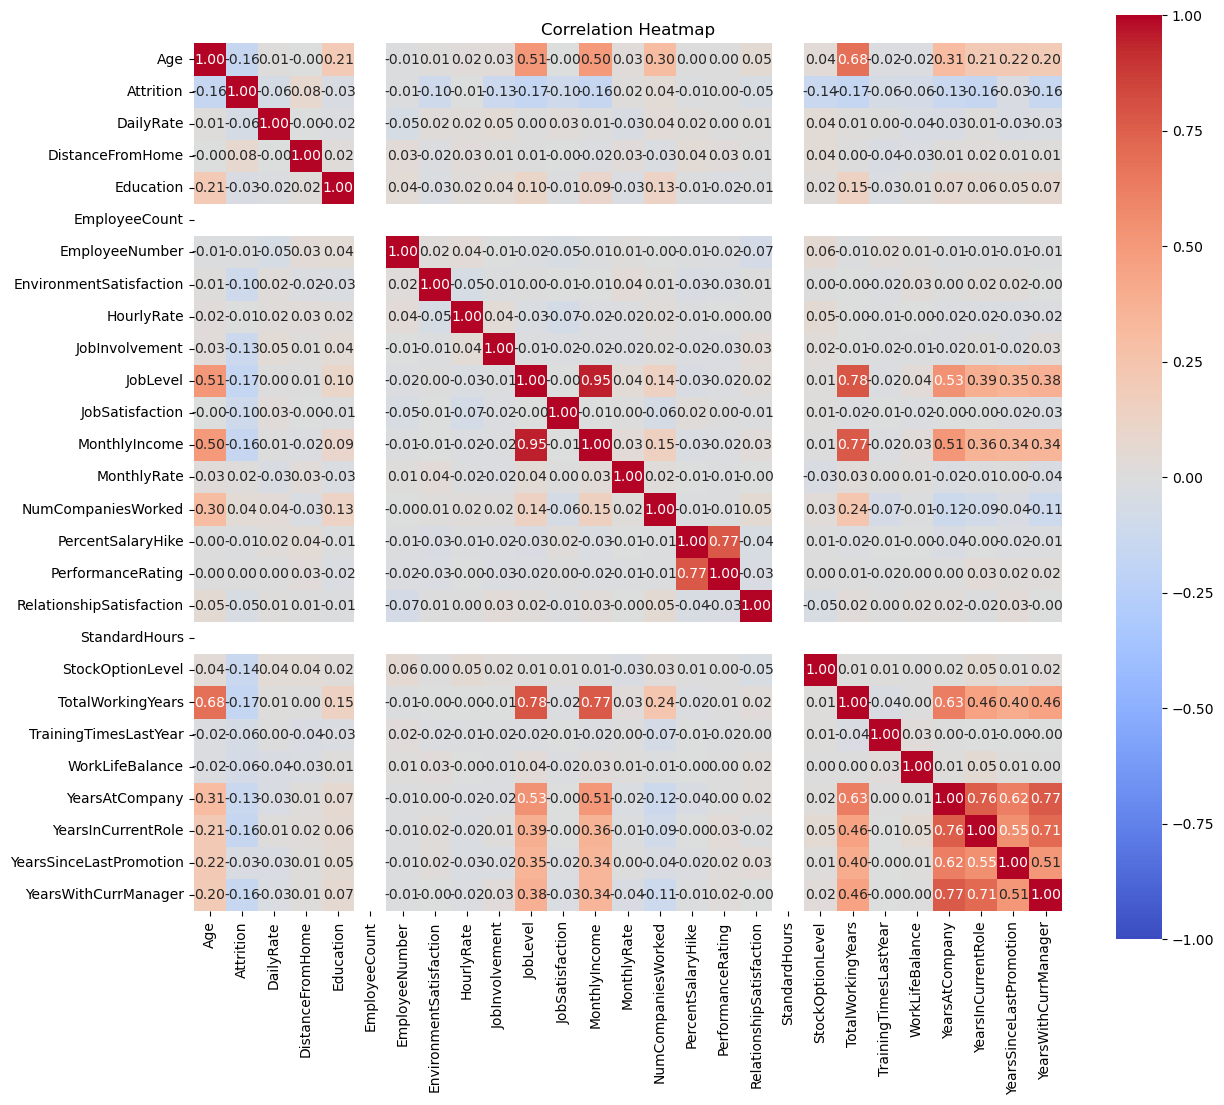

In [5]:
# Memilih hanya fitur numerik untuk korelasi
numeric_features = df.select_dtypes(include='number')

# Menghitung matriks korelasi antara fitur numerik
correlation_matrix = numeric_features.corr()

# Mengatur ukuran subplot
plt.figure(figsize=(14, 12))

# Membuat heatmap korelasi dengan range korelasi antara -1 dan 1
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Analisis: ####
- Fitur EmployeeCount dan StandardHours tidak relevan dan harus didrop
- Fitur yang paling berhubungan dengan Attrition adalah JobLevel & TotalWorkingYears berkorelasi secara negatif atau bermakna semakin kecil value di JobLevel dan TotalWorkingYears maka semakin besar kecenderungan untuk Attrition.
- Hubungan antara fitur MonthlyIncome dengan JobLevel adalah fitur dengan korelasi tertinggi sebesar 0.95. Hal ini menandakan bahwa keduanya saling berkaitan dan mempengaruhi satu sama lain.

#### Fitur Kategorikal yang perlu dipertahankan (Berdasarkan Chi-Square Test) antara lain: ####
- BusinessTravel
- Department
- EducationField
- MaritalStatus
- JobRole
- OverTime

#### Fitur Numeric yang dipertahankan (threshold: 0.05): ####
- Age
- DailyRate
- DistanceFromHome
- EnvironmentSatisfaction
- JobInvolvement
- JobLevel
- JobSatisfaction
- MonthlyIncome
- RelationshipSatisfaction
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- YearsAtCompany
- YearsInCurrentRole
- YearsWithCurrManager

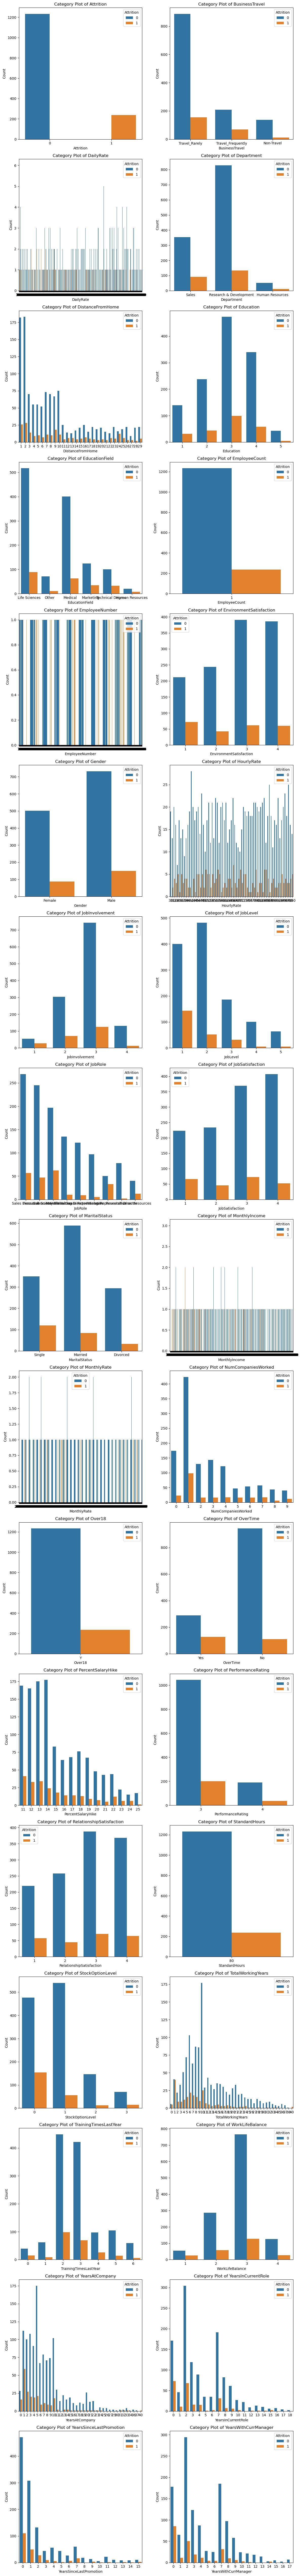

In [9]:
# Menentukan fitur yang akan ditampilkan
features = df.columns[1:]  # Menggunakan semua fitur kecuali kolom target 'Attrition'

# Menghitung jumlah subplot yang diperlukan
num_plots = len(features) // 2 + len(features) % 2

# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(num_plots, 2, figsize=(12, 6 * num_plots))
axes = axes.flatten()

# Melakukan category plots untuk setiap fitur
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue='Attrition', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Category Plot of {feature}')
    axes[i].legend(title='Attrition')

# Menyembunyikan subplot yang tidak digunakan
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

# Menampilkan plot
plt.tight_layout()
plt.show()

Analisis:
- Diperlukan encoding pada fitur kategorikal seperti Gender, BusinessTravel,  
- Terlihat bahwa StandardHours, EmployeeCount, EmployeeNumber dan Over18 hanya terdiri dari 1 jawaban sehingga tidak diperlukan sebagai fitur model.